# Categorizing FIFA'19 soccer players

$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\Z}{\mathbf{Z}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
\newcommand{\loss}{\ell}
\newcommand{\eloss}{\mc{L}}
\newcommand{\abs}[1]{| #1 |}
\newcommand{\norm}[1]{\| #1 \|}
\newcommand{\tp}{T}
$$

__<div style="text-align: right"> EE370: Software lab, Kyung Hee University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@khu.ac.kr) </div>_

The following loads the analysis records containing detailed attributes of 13,000 soccer players.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('http://jonghank.github.io/ee370/files/fifa19data.csv')
df = df[:13000]

For example the first five players:

In [2]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


The columns from 'Crossing', 'Finishing', 'HeadingAccuracy' all the way up to 'GKPositioning' and GKReflexes' contain a variety of rating scores on 34 skill sets for each player.

We'd like to cluster the 13,000 players into 6 groups, purely based on those ratings the 34 skill sets.

**(Problem 1)** Crop the 34 columns from 'Crossing' to 'GKReflexes' out to build a feature matrix. Save it in a numpy array.

In [3]:
# your code here
skillSets = np.array(df.loc[:,'Crossing':'GKReflexes'])

In [4]:
skillSets

array([[84., 95., 70., ..., 15., 14.,  8.],
       [84., 94., 89., ..., 15., 14., 11.],
       [79., 87., 62., ..., 15., 15., 11.],
       ...,
       [51., 61., 59., ..., 11.,  7., 13.],
       [38., 66., 57., ..., 11., 12., 11.],
       [52., 55., 39., ..., 15.,  9., 11.]])

**(Problem 2)** Fit a $k$-means model to cluster the players into 6 categories. You may use the `Kmeans` module from the `scikit-learn` package (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

In [5]:
# your code here
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=0).fit(skillSets)


**(Problem 3)** Now you should be able to find the representative rating values on those 34 skills, for each category. For each of the six categories, report the best five skills on which the group members mark high scores. You may find `dataframe.columns.get_loc()` function useful. For example, `df.columns.get_loc('Crossing')` returns the index for the column entitled 'Crossing'.

In [6]:
# your code here
kmeans2 = [[[0,i] for i in range(34)] for j in range(6)]

for i in range(6):
  for j in range(34):
    kmeans2[i][j][0] = kmeans.cluster_centers_[i][j]
  kmeans2[i].sort(reverse=True)

for i in range(6):
  print("cluster {}: {}".format(i, [df.iloc[:,df.columns.get_loc("Crossing") + kmeans2[i][j][1]].name for j in range(5)]))

cluster 0: ['Strength', 'Jumping', 'Aggression', 'StandingTackle', 'HeadingAccuracy']
cluster 1: ['Stamina', 'Jumping', 'SprintSpeed', 'Acceleration', 'Strength']
cluster 2: ['GKReflexes', 'GKDiving', 'GKPositioning', 'GKHandling', 'GKKicking']
cluster 3: ['Stamina', 'ShortPassing', 'BallControl', 'ShotPower', 'Agility']
cluster 4: ['Agility', 'Acceleration', 'SprintSpeed', 'Balance', 'Dribbling']
cluster 5: ['Strength', 'SprintSpeed', 'Jumping', 'ShotPower', 'Finishing']


The column 'Position' from the original dataframe contains the most preferred positions for each player. For abbreviations, refer to http://logfact.com/football-soccer-field-player-positions-abbreviations/. For example, the whole records of 13,000 players are consisted of the following positions.



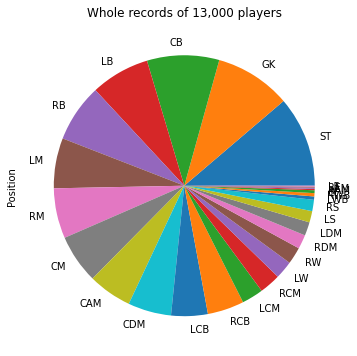

In [7]:
plt.figure(figsize=(6,6))
plt.title('Whole records of 13,000 players')
df['Position'].value_counts().plot(kind='pie')
plt.show()

**(Problem 4)** For each group, show the members' positions in a pie chart. You may find `df['a'].value_counts()` which counts the number of different items on the column `a`, or `df['a'].value_counts().plot(kind='pie')` which plots the pie chart, helpful.

In [8]:
# your code here
prediction = kmeans.predict(skillSets)
dfList = [pd.DataFrame() for i in range(6)]
for i in range(13000):
  dfList[prediction[i]] = dfList[prediction[i]].append(df.iloc[i].copy())

# why does this take so looooooong

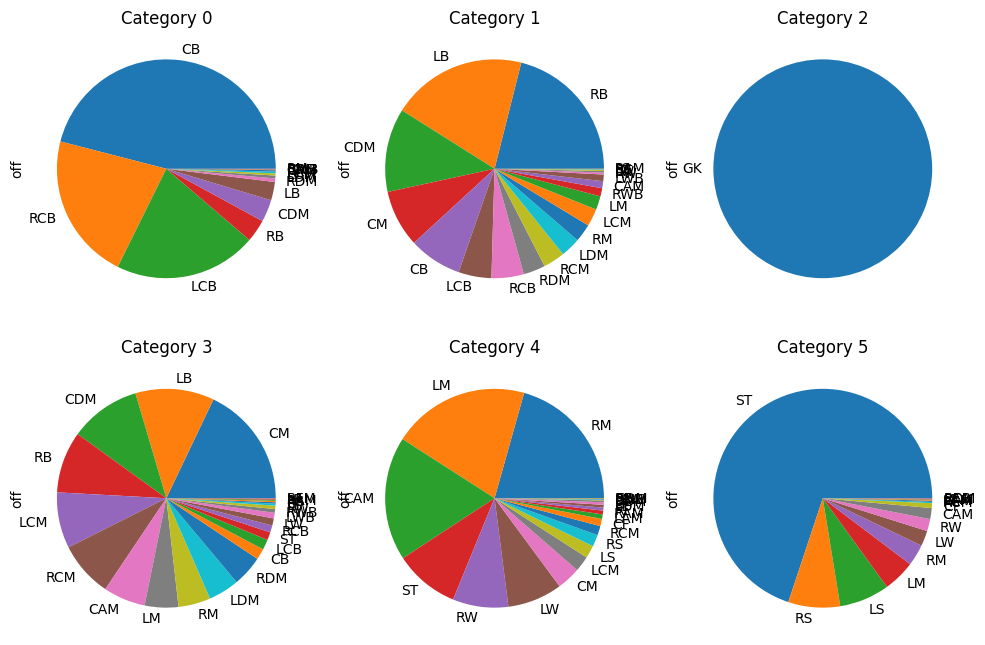

In [9]:
plt.figure(figsize=(12,8), dpi=100)

for i in range(6):  
  plt.subplot(2,3,i+1)
  plt.title("Category {}".format(i))
  dfList[i]['Position'].value_counts().plot(kind='pie', label='off')

plt.show()